In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [0]:
from google.colab import files
uploaded = files.upload()


Saving 3.12. Example.csv to 3.12. Example.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['3.12. Example.csv']))

In [0]:
df2.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Satisfaction    30 non-null int64
Loyalty         30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [0]:
df2.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


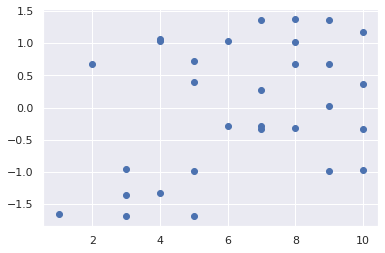

In [0]:
plt.scatter(x= df2['Satisfaction'],y=df2['Loyalty'])
plt.show()

In [0]:
kmeans = KMeans(2)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
cluster = df2.copy()
cluster['predict'] = kmeans.fit_predict(df2)
cluster.head()

,Satisfaction,Loyalty,predict
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


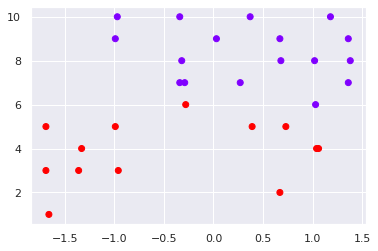

In [0]:
plt.scatter(x=cluster['Loyalty'],y=cluster['Satisfaction'],c=cluster['predict'],cmap='rainbow')
plt.show()


Standardize the variable
```

```



In [0]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(df2)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [0]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iterr=kmeans.inertia_
    wcss.append(wcss_iterr)

In [0]:
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.326631124753926,
 4.519965019741716,
 3.687975963852466]

Text(0, 0.5, 'Within-cluster Sum of Squares')

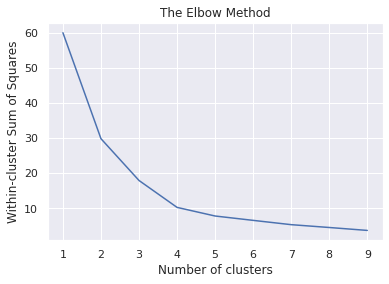

In [0]:
number_cluster = range(1,10)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [0]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
cluster = df2.copy()
cluster['predict'] = kmeans.fit_predict(x_scaled)
cluster.head()

,Satisfaction,Loyalty,predict
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0


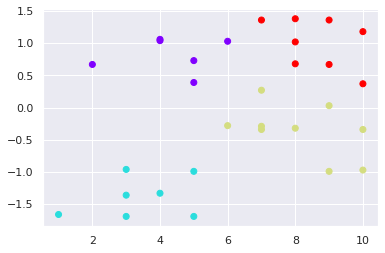

In [0]:
plt.scatter(x=cluster['Satisfaction'],y=cluster['Loyalty'],c=cluster['predict'],cmap='rainbow')
plt.show()